# Exam R
Simo Smeets u191293, 2011704 collaborator: Kim van Dijk u765246, 2011759

# Introduction

The exam consists of 2 parts. In the first part, you have to run a regression, test if the assumptions of a linear regression model are met, and make 2 graphs.

In the second part of the exam, you will have to make a map of Catholic and Protestant schools in the Netherlands.

# Packages


In [79]:
library(tidyverse)
library(gvlma)
library(dplyr)

# Assignment 1


## Data

The data are given:


In [80]:
set.seed(123)
df1 <- as.data.frame(matrix(runif(1*50, min = 1, max = 10), ncol = 1)) %>%
    mutate(epsilon = rnorm(50, mean = 0, sd = 2)) %>%
    mutate(response = 3 - 2* V1  + epsilon) %>%
    mutate(group = ifelse(V1 <= 5, 1,2))

## Asignment 1a

The first assigment is to make boxplot using ggplot with group on the x-axis and V1 on the y-axis.

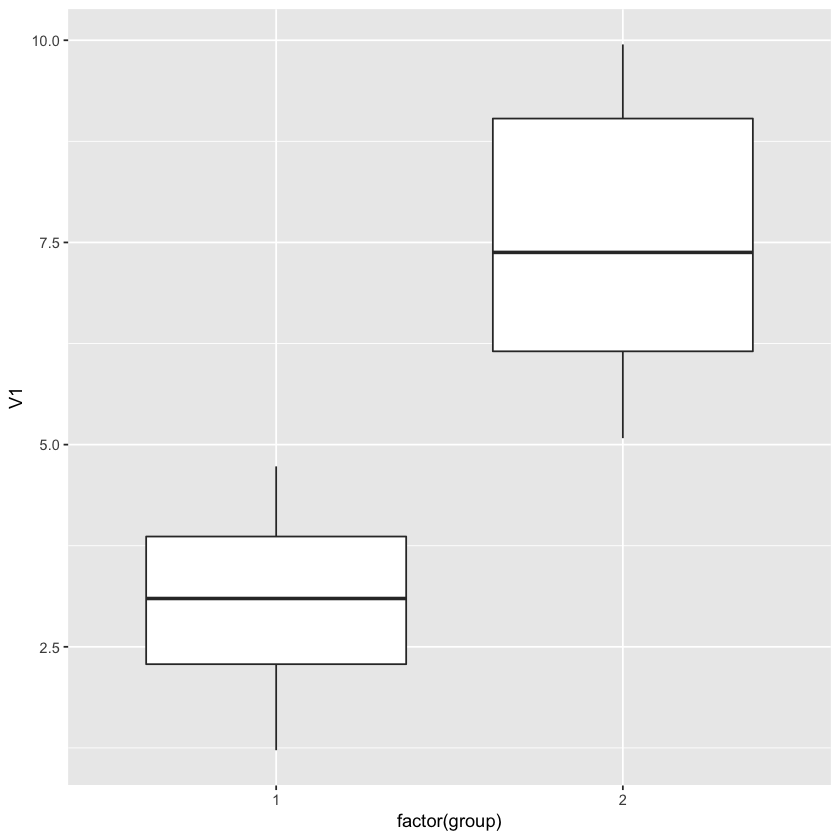

In [81]:
ggplot (df1, aes(x = factor(group), y = V1)) + 
    geom_boxplot()

We made a boxplot using ggplot2. We have two boxplots because there are two groups.

## Assignment 1b

Run a regression with response variable as a function of V1.
Show the summary statistics of the regression.


In [82]:
reg1 <- lm(data=df1, V1 ~ group)
summary(reg1)


Call:
lm(formula = V1 ~ group, data = df1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.49501 -1.05796  0.02595  1.34275  2.37341 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.4450     0.6707  -2.154   0.0363 *  
group         4.5100     0.4052  11.130 6.78e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.414 on 48 degrees of freedom
Multiple R-squared:  0.7207,	Adjusted R-squared:  0.7149 
F-statistic: 123.9 on 1 and 48 DF,  p-value: 6.783e-15


In [ ]:
We run a regression using the lm function. 

check if the assumptions of linear regression are met with the `gvlma()` function.

In [83]:
gvlma(reg1)


Call:
lm(formula = V1 ~ group, data = df1)

Coefficients:
(Intercept)        group  
     -1.445        4.510  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = reg1) 

                       Value p-value                Decision
Global Stat        3.756e+00  0.4401 Assumptions acceptable.
Skewness           1.037e-01  0.7474 Assumptions acceptable.
Kurtosis           2.627e+00  0.1050 Assumptions acceptable.
Link Function      8.752e-17  1.0000 Assumptions acceptable.
Heteroscedasticity 1.025e+00  0.3114 Assumptions acceptable.

In [ ]:
We checked it by using GVLMA.

## Assignment 1c

Make a scatterplot with: 
* V1 on the x-axis and the response on the y-axis
* Include the regression line in red with confidence interval 
* In a classic theme
* The x-axis should be labeled "Predictor", the y-axis should be labeled ("Response")



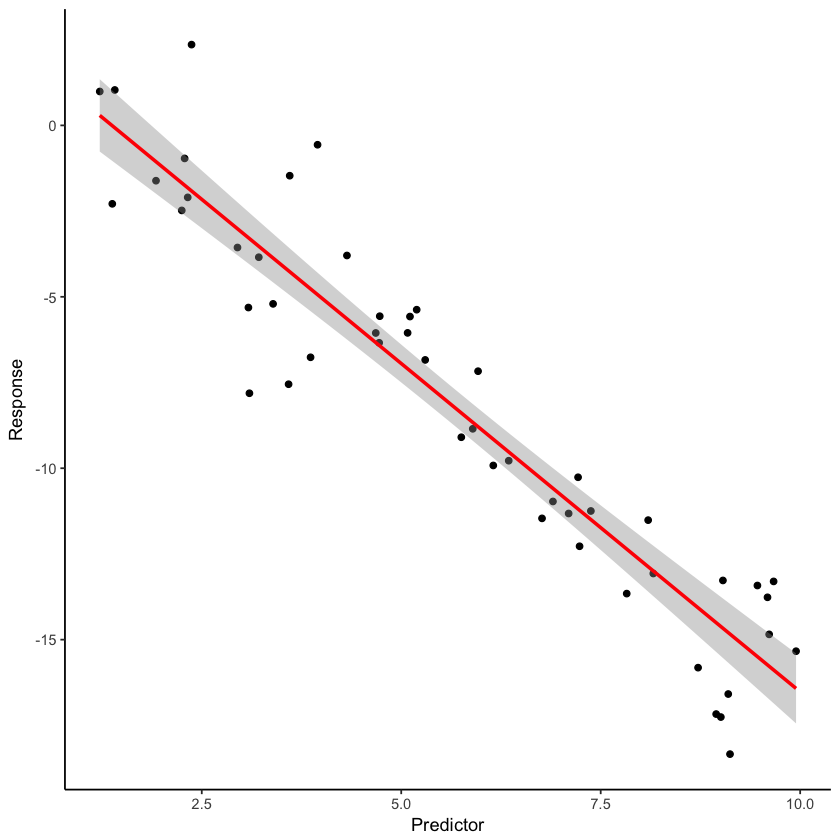

In [84]:
ggplot (df1, aes(x = V1, y = response)) + 
    geom_point() +
    geom_smooth(method='lm',formula=y~x, color = "red") +
    theme_classic() +
    xlab("Predictor") +
    ylab("Response")

In [ ]:
We made a scatter plot by using ggplot and we added geom_point to create this plot.

# Assigment 2

# Packages

In [85]:
install.packages('maptools', repos='http://cran.us.r-project.org')
install.packages('rgdal', repos='http://cran.us.r-project.org')
install.packages('rgeos', repos='http://cran.us.r-project.org')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Warning message in install.packages("rgdal", repos = "http://cran.us.r-project.org"):
“installation of package ‘rgdal’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Warning message in install.packages("rgeos", repos = "http://cran.us.r-project.org"):
“installation of package ‘rgeos’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [97]:
install.packages("thematicmaps_2.1.tar.gz", repos = NULL, type = "source")

Warning message in install.packages("thematicmaps_2.1.tar.gz", repos = NULL, type = "source"):
“installation of package ‘thematicmaps_2.1.tar.gz’ had non-zero exit status”

In [98]:
library(thematicmaps)
library(tidyverse)

ERROR: Error in library(thematicmaps): there is no package called ‘thematicmaps’


## Assignment 2a

First you have to read in the file "nld_municipal_map.csv".
Hint: Look at the notebook of week 6 about maps.

In [88]:
map_municipal <- read.csv2("nld_municipal_map.csv")
head(map_municipal)

name,id,x,y,order,hole,piece,group
Appingedam,0,251260.527548325,594393.827234474,1,FALSE,1,0.1
Appingedam,0,251427.775868901,594486.747111725,2,FALSE,1,0.1
Appingedam,0,251668.842999999,594646.77,3,FALSE,1,0.1
Appingedam,0,251713.521000002,594770.885000002,4,FALSE,1,0.1
Appingedam,0,251354.585000001,595461.381999999,5,FALSE,1,0.1
Appingedam,0,251310.272,596022.542,6,FALSE,1,0.1


In [ ]:
We read the csv file

## Assignment 2b

Now you can make an empty map of the Netherlands.

In [89]:
AddMapLayer(MapPlot(), map_municipal)

ERROR: Error in AddMapLayer(MapPlot(), map_municipal): could not find function "AddMapLayer"


In [99]:
We tried to create a plot with the empty map of The Netherlands. We couldnt import the package.

ERROR: Error in parse(text = x, srcfile = src): <text>:1:4: unexpected symbol
1: We tried
       ^


## Assignment 2c

Read in the pc4 locations (nld_pc4_locations.csv).

Hint: Don't forget the X and Y should be numeric variables!

In [91]:
pc4_locations <- read.csv2(file = "nld_pc4_locations.csv")

str(pc4_locations)

'data.frame':	4066 obs. of  3 variables:
 $ PC4: int  1011 1012 1013 1014 1015 1016 1017 1018 1019 1021 ...
 $ X  : Factor w/ 4066 levels "100024.115074611",..: 528 513 482 460 491 485 502 543 559 544 ...
 $ Y  : Factor w/ 4066 levels "308396.770615801",..: 2500 2509 2557 2552 2518 2497 2473 2487 2501 2529 ...


## Assignment 2d

### 2di

Read in the school data


In [92]:
schools <- read.csv2(file = "schools.csv")

### 2dii

First, create a new dataframe schools1, which is equal to schools.

As you see POSTCODE has a structure of (1234 AB). You should create a new variable PC4 that is equal to the first 4 numbers in POSTCODE

Hint: Use the function `substr()`

Then select the variables PC4 and DENOMINATIE

In [94]:
schools1 <- schools %>% 
    mutate(PC4 = substr(POSTCODE,1,4))
select(schools1, "PC4", "DENOMINATIE")

PC4,DENOMINATIE
,Openbaar
9406,Openbaar
9401,Openbaar
9402,Openbaar
9331,Openbaar
9411,Openbaar
9461,Openbaar
9402,Openbaar
9402,Openbaar
9403,Openbaar


In [ ]:
We made a new dataframe called schools1, by mutating the old dataframe schools. We created the PC4 column by using the substr function. 

### 2diii

Create the dataframe school_loc as a join from pc4_locations and school1 that combines the columns from both data frames, but only keeps rows where the value in the pc4_locations column matches in both data frames.
And then select the observations with DENOMINATIE is equal to "Rooms-Katholiek" or "Protestants-Christelijk"

In [95]:
school_loc <- merge(schools1, pc4_locations, by = c("PC4"), x.all = TRUE)
head(school_loc)

PC4,PROVINCIE,BEVOEGD.GEZAG.NUMMER,BRIN.NUMMER,VESTIGINGSNUMMER,VESTIGINGSNAAM,STRAATNAAM,HUISNUMMER.TOEVOEGING,POSTCODE,PLAATSNAAM,⋯,WGR.GEBIED.CODE,WGR.GEBIED.NAAM,COROPGEBIED.CODE,COROPGEBIED.NAAM,ONDERWIJSGEBIED.CODE,ONDERWIJSGEBIED.NAAM,RMC.REGIO.CODE,RMC.REGIO.NAAM,X,Y
1013,Noord-Holland,42621,21ET,21ET12,Scholengemeenschap Amsterdam-Zuid voor Atheneum Havo Mavo Vbo Lwoo,Haarlemmerstraat,132-136,1013 EX,AMSTERDAM,⋯,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam,120324.504123209,489671.682341738
1013,Noord-Holland,40586,30GC,30GC00,Het 4e Gymnasium,Archangelweg,4,1013 ZZ,AMSTERDAM,⋯,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam,120324.504123209,489671.682341738
1014,Noord-Holland,42621,17HB,17HB07,Scholengemeenschap ZAAM West voorVwo Havo Mavo Vbo Lwoo,Zekeringstraat,38-+40,1014 BT,AMSTERDAM,⋯,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam,119515.029078042,489421.741526331
1014,Noord-Holland,67107,02PA,02PA00,Stichting Media Amsterdam,Contactweg,36,1014 AN,AMSTERDAM,⋯,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam,119515.029078042,489421.741526331
1016,Noord-Holland,40586,17YS,17YS21,Esprit Scholen voor Lyceum Havo Mavo Vbo Lwoo,Tweede Passeerdersdwstr,9,1016 XE,AMSTERDAM,⋯,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam,120537.758537905,487075.388236409
1017,Noord-Holland,13556,21AB,21AB00,Barlaeus Gymnasium,Weteringschans,31,1017 RV,AMSTERDAM,⋯,21,Agglomeratie Amsterdam,23,Groot-Amsterdam,15,Zuid-Noord-Holland,21,Agglomeratie Amsterdam,121225.666243389,486219.900904655


In [96]:
a<- school_loc
b<- a[a$DENOMINATIE == 'Rooms-Katholiek' | a$DENOMINATIE == 'Protestants-Christelijk',]
b[1:10,1:15]

,PC4,PROVINCIE,BEVOEGD.GEZAG.NUMMER,BRIN.NUMMER,VESTIGINGSNUMMER,VESTIGINGSNAAM,STRAATNAAM,HUISNUMMER.TOEVOEGING,POSTCODE,PLAATSNAAM,GEMEENTENUMMER,GEMEENTENAAM,DENOMINATIE,TELEFOONNUMMER,INTERNETADRES
29,1065,Noord-Holland,41217,01TC,01TC00,Scholengemeenschap voor Vwo Havo Mavo Het Hervormd Lyceum,Hemsterhuisstraat,79,1065 JX,AMSTERDAM,363,AMSTERDAM,Protestants-Christelijk,206152780,www.hlw.nl
38,1071,Noord-Holland,40776,02AN,02AN00,Fons Vitae Lyceum Rooms Katholiek Scholengemeenschap voor Vwo en Havo,Reijnier Vinkeleskade,53,1071 SW,AMSTERDAM,363,AMSTERDAM,Rooms-Katholiek,206625274,www.fonsvitae.nl
50,1077,Noord-Holland,41217,02AR,02AR00,Scholengemeenschap voor Athenum en Havo Het Hervormd Lyceum Zuid,Brahmsstraat,7,1077 HE,AMSTERDAM,363,AMSTERDAM,Protestants-Christelijk,206627983,www.hlz.nl
51,1077,Noord-Holland,40776,14SE,14SE00,Scholengemeenschap Sint Nicolaas Lyceum voor Lyceum en Havo,Beethovenplein,2,1077 WM,AMSTERDAM,363,AMSTERDAM,Rooms-Katholiek,206445151,www.nicolaas.nl
57,1081,Noord-Holland,41217,14VY,14VY00,Chr Sgm Buitenveldert v Gymn Ath Havo en Mavo,De Cuserstraat,3,1081 CK,AMSTERDAM,363,AMSTERDAM,Protestants-Christelijk,206423902,www.csb-amsterdam.nl
80,1132,Noord-Holland,72853,20GS,20GS00,Don Bosco College Atheneum Havo Vmbo Lwoo,Heideweg,2,1132 DB,VOLENDAM,385,EDAM-VOLENDAM,Rooms-Katholiek,299399299,www.donboscocollege.com
81,1132,Noord-Holland,72853,20GS,20GS01,Don Bosco College Atheneum Havo Vmbo Lwoo,Val van Urk,1,1132 BH,VOLENDAM,385,EDAM-VOLENDAM,Rooms-Katholiek,NA,
86,1185,Noord-Holland,41217,02TE,02TE00,H Wesselink College Christelijke Scholengemeenschap voor Vwo Havo Mavo,Startbaan,3,1185 XP,AMSTELVEEN,362,AMSTELVEEN,Protestants-Christelijk,206459751,www.hermannwesselinkcollege.nl/
87,1185,Noord-Holland,71553,02QZ,02QZ00,Keizer Karel College Vwo Havo,Elegast,5,1185 AA,AMSTELVEEN,362,AMSTELVEEN,Rooms-Katholiek,206415700,www.keizerkarelcollege.nl/
88,1211,Noord-Holland,40676,00PS,00PS05,Verenigde Scholen J.A. Alberdingk Thijm VO. Locatie: St. Aloysius College,Schapenkamp,200,1211 PB,HILVERSUM,402,HILVERSUM,Rooms-Katholiek,356247481,www.atscholen.nl


In [ ]:
First we merged the pc4_locations and schools dataframes togheter by filtering the PC4 column. Then we selected the two variables and created a new dataframe.

## Assignment 2e

Create a map of Catholic and Protestant schools in the Netherlands


In [100]:
 ?

ERROR: Error in parse(text = x, srcfile = src): <text>:2:0: unexpected end of input
1:  ?
   ^


End of notebook